In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# reding training data:
tr_titan = pd.read_csv('../input/train.csv')
te_titan = pd.read_csv('../input/test.csv')
te_titan.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


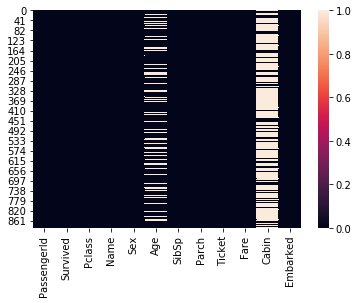

In [4]:
sns.heatmap(tr_titan.isnull())

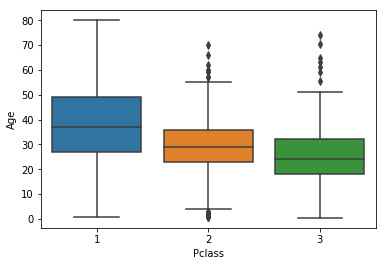

In [5]:
sns.boxplot(x = 'Pclass',y = 'Age',data = tr_titan)




In [6]:
means =  round(tr_titan.groupby(tr_titan.Pclass)['Age'].mean())
means
#means.iloc[0]

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [7]:
def ageNAfiller(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age): 
        if Pclass ==1:
            return  means.iloc[0]
        elif Pclass == 2:
            return  means.iloc[1]
        else:
            return  means.iloc[2]
    else:
        return Age
    

In [8]:
tr_titan['Age']=tr_titan[['Age','Pclass']].apply(ageNAfiller,axis = 1)
tr_titan['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

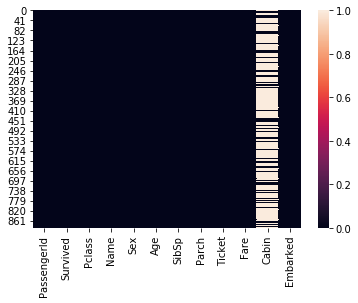

In [9]:
sns.heatmap(tr_titan.isnull())

In [10]:
tr_titan.drop('Cabin',axis = 1,inplace = True )
tr_titan.dropna(inplace = True)

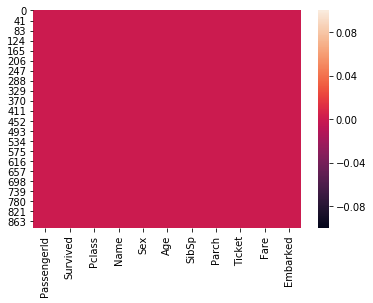

In [11]:
sns.heatmap(tr_titan.isnull())

In [12]:
tr_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
sex = pd.get_dummies(tr_titan['Sex'],drop_first = True)

In [14]:


embark = pd.get_dummies(tr_titan['Embarked'],drop_first= True)
tr_titan = pd.concat([tr_titan,sex,embark],axis = 1)
tr_titan.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis = 1, inplace = True)
tr_titan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [15]:
te_titan['Age']=te_titan[['Age','Pclass']].apply(ageNAfiller,axis = 1)

In [16]:
te_titan.drop('Cabin',axis = 1,inplace = True )



In [17]:
sex = pd.get_dummies(te_titan['Sex'],drop_first = True)

In [18]:



embark = pd.get_dummies(te_titan['Embarked'],drop_first= True)
te_titan = pd.concat([te_titan,sex,embark],axis = 1)
te_titan.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis = 1, inplace = True)
te_titan.head()


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
X = tr_titan[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = tr_titan['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)


X_test = te_titan



In [20]:
models = []
models.append(('Random Forest', RandomForestClassifier(n_estimators=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOGR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))



In [21]:
best_model = None
best_model_name = ""
best_valid = 0
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    accuracy = model.score(X_valid,y_valid)
    if accuracy > best_valid:
        best_valid = accuracy
        best_model = model
        best_model_name = name

print(f"Best model is {best_model_name}")
best_valid

Best model is LOGR


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8027210884353742

In [22]:
len(X_test)
col_mask=X_test.isnull().any(axis=0)
col_mask
X_test = X_test.fillna(0)
predictions = best_model.predict(X_test)


In [23]:

len(predictions)

418

In [24]:
sub_titan = pd.read_csv('../input/test.csv')
sub_titan.head()
len(sub_titan)


418

In [25]:
P_Id = sub_titan['PassengerId']
len(P_Id)
predict_sur=pd.Series(predictions, name='Survived')
#predict_sur.tail()
result = pd.concat([P_Id, predict_sur], axis=1)
#result['Survived'].fillna(0, inplace = True)

result.to_csv('Submission.csv',index=False)

result.tail()

              




,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
